# Clustering con Python

## Importar el dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../datasets/wine/winequality-red.csv', sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
import matplotlib.pyplot as plt

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

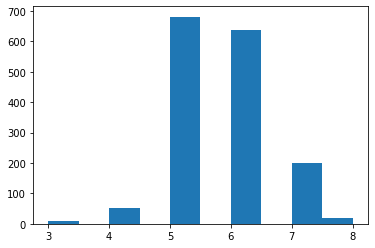

In [6]:
plt.hist(df['quality'])

In [7]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


## Normalización de los datos

In [8]:
df_norm = (df - df.min()) / (df.max() - df.min())
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


## Clustering jerárquico con scikit-learn

In [9]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
clus = AgglomerativeClustering(n_clusters=6, linkage='ward').fit(df_norm) # Asumimos que queremos tener 6 clusters

In [28]:
md_h = pd.Series(clus.labels_)

Text(0, 0.5, 'Número de vinos del cluster')

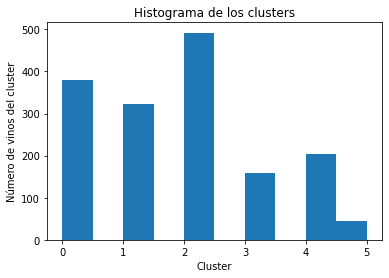

In [29]:
plt.hist(md_h)
plt.title('Histograma de los clusters')
plt.xlabel('Cluster')
plt.ylabel('Número de vinos del cluster')

In [15]:
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]], dtype=int64)

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [18]:
Z = linkage(df_norm, 'ward')

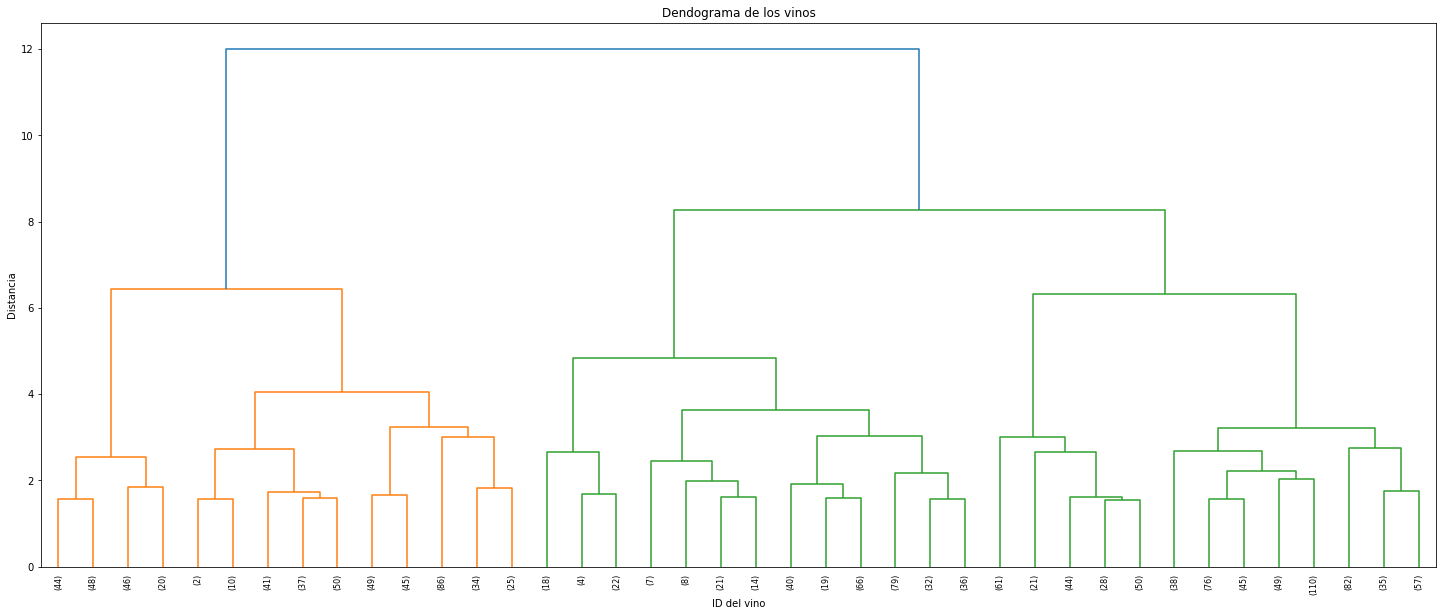

In [23]:
plt.figure(figsize=(25,10))
plt.title('Dendograma de los vinos')
plt.xlabel('ID del vino')
plt.ylabel('Distancia')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8., truncate_mode='lastp', p=40)
plt.show()

## K-Means

In [24]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [25]:
model = KMeans(n_clusters=6)
model.fit(df_norm)

KMeans(n_clusters=6)

In [30]:
md_k = pd.Series(model.labels_)

In [31]:
df_norm['clust_h'] = md_h
df_norm['clust_k'] = md_k

In [32]:
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,2
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,0


(array([506.,   0., 318.,   0., 248.,   0., 274.,   0., 223.,  30.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

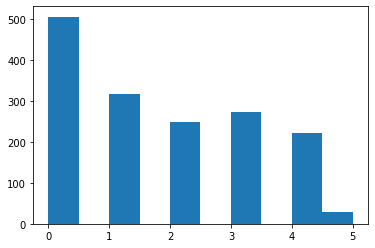

In [33]:
plt.hist(md_k)

In [34]:
model.cluster_centers_ # Estos son los varicentros de cada cluster

array([[0.26272343, 0.35951459, 0.11796443, 0.09140316, 0.12255604,
        0.14567444, 0.1074177 , 0.49059161, 0.48770658, 0.15514426,
        0.22103476, 0.44071146],
       [0.31733177, 0.27929267, 0.30421384, 0.15202033, 0.12708812,
        0.3782886 , 0.29644199, 0.54024788, 0.43579458, 0.17849207,
        0.21275601, 0.45345912],
       [0.58242935, 0.20579706, 0.51197581, 0.13400354, 0.13117965,
        0.13908451, 0.09183005, 0.65596431, 0.33194691, 0.22249855,
        0.29185277, 0.54758065],
       [0.36202442, 0.16017148, 0.41905109, 0.10378962, 0.10596127,
        0.1598643 , 0.08302597, 0.41531882, 0.42059888, 0.23565278,
        0.47894441, 0.69124088],
       [0.17373705, 0.32388353, 0.09251121, 0.0939554 , 0.09562275,
        0.25298427, 0.12638451, 0.32242877, 0.57904029, 0.18603152,
        0.49143383, 0.61255605],
       [0.33716814, 0.29223744, 0.48133333, 0.07557078, 0.53789649,
        0.20938967, 0.21071849, 0.5143906 , 0.2335958 , 0.59001996,
        0.16512821,

In [35]:
model.inertia_

186.54413976965506

## Interpretación Final

In [36]:
df_norm.groupby('clust_k').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h
clust_k,,,,,,,,,,,,,
0,0.262723,0.359515,0.117964,0.091403,0.122556,0.145674,0.107418,0.490592,0.487707,0.155144,0.221035,0.440711,2.019763
1,0.317332,0.279293,0.304214,0.152020,0.127088,0.378289,0.296442,0.540248,0.435795,0.178492,0.212756,0.453459,1.053459
2,0.582429,0.205797,0.511976,0.134004,0.131180,0.139085,0.091830,0.655964,0.331947,0.222499,0.291853,0.547581,2.036290
3,0.362024,0.160171,0.419051,0.103790,0.105961,0.159864,0.083026,0.415319,0.420599,0.235653,0.478944,0.691241,0.135036
4,0.173737,0.323884,0.092511,0.093955,0.095623,0.252984,0.126385,0.322429,0.579040,0.186032,0.491434,0.612556,3.452915
5,0.337168,0.292237,0.481333,0.075571,0.537896,0.209390,0.210718,0.514391,0.233596,0.590020,0.165128,0.466667,4.900000
